
**Лабораторная работа №1: Первичное исследование данных**


# **1. Постановка задачи**

**Описание датасета**

Датасет содержит информацию о подержанных автомобилях Toyota моделей GT86, Corolla, RAV4 и т.д. Включает характеристики: модель, год выпуска, цена, тип трансмиссии, пробег, тип топлива, налог, расход топлива (mpg), объем двигателя. Набор данных может использоваться для анализа рынка подержанных автомобилей.

**Условный заказчик**

* Автодилеры, оценивающие рыночную стоимость автомобилей.

* Потенциальные покупатели, сравнивающие варианты.

* Аналитики рынка подержанных автомобилей.

* Сервис онлайн-продажи автомобилей (например, Auto.ru, Avito).

**Возможные задачи ИАД**

* Предсказание цены автомобиля на основе характеристик.

* Кластеризация автомобилей по ценовым сегментам.

* Анализ влияния года выпуска и пробега на стоимость.

#**2. Паспорт датасета**

**Загрузка данных**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upl = files.upload()
# Загрузка данных
df = pd.read_csv('toyota.csv')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head(10)

Saving toyota.csv to toyota (2).csv
Размер датасета: 6738 строк, 9 столбцов


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


**Структура данных**

In [ ]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# **3. Аудит качества данных**

**3.1. Пропуски**


In [9]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

if len(missing) > 0:
    print(missing[missing['Пропуски'] > 0])

Empty DataFrame
Columns: [Пропуски, Доля (%)]
Index: []


пропусков нет

**3.2. Дубликаты**

In [11]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')


Полных дубликатов строк: 39


**3.3. Выбросы** (на примере налога)

Выбросов по методу IQR: 3


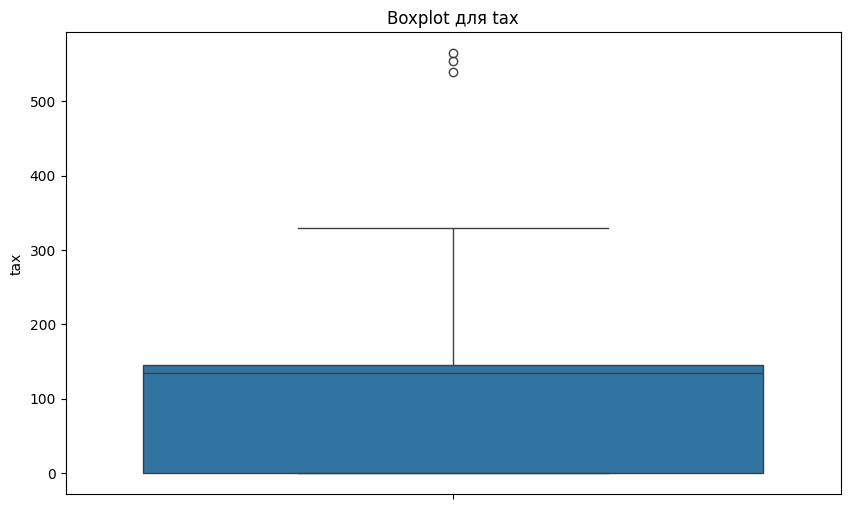

In [12]:

column = 'tax'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()


# **4. Разведочный анализ (EDA)**
**4.1. Распределение числового признака (в данном случае цены)**

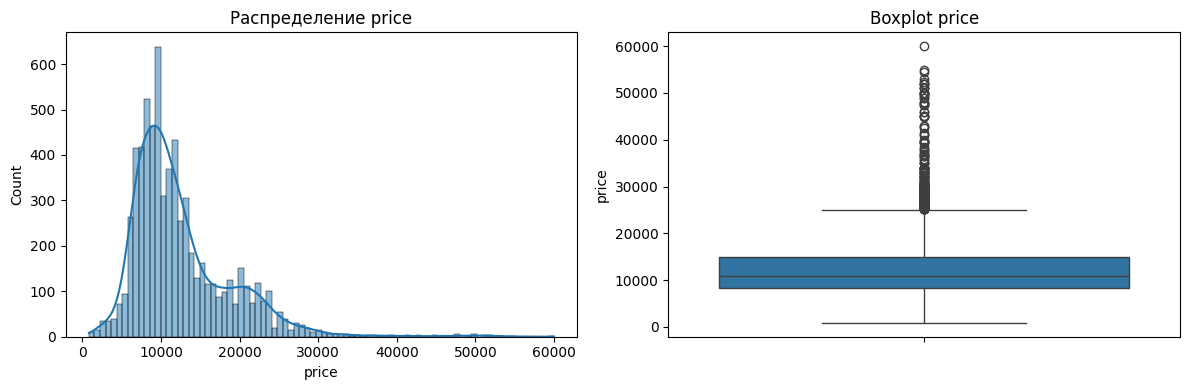

In [13]:
numeric_col = 'price'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

Распределение цены правостороннее, много недорогих авто и отдельные дорогие экземпляры.




**4.2. Анализ категориального признака (в данном случае модели)**

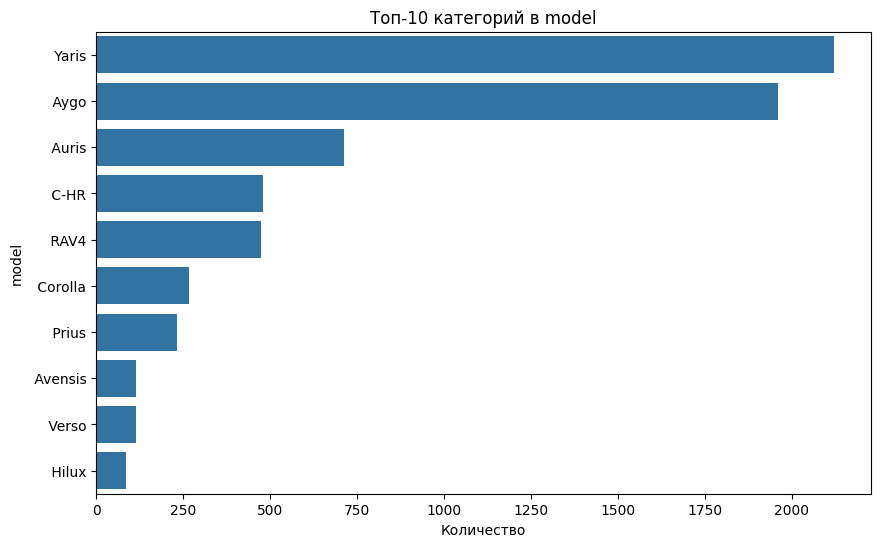

In [14]:
cat_col = 'model'

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-10 категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

Наиболее представлена модель Yaris, затем RAV4, Corolla, GT86.

# **5. Выводы**

Детали в файле `report/quality_report.md`